In [1]:
import os
from os.path import isfile

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/A_Z Handwritten Data.csv")

In [41]:
def clean(value):
    return 0 if value > 60 else 255

dfK = df[df['0']==22]
dfK = dfK.applymap(clean)
dfK['0'] = ord('w')

K_y = dfK['0']
K_x = dfK.drop(columns=['0'])

print(K_x.iloc[1].values.reshape(28, 28)[1:])
plt.imshow(cmap='gray', vmin=0, vmax=255, X=K_x.iloc[1].values.reshape(28, 28))
plt.show()

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
    0   0   0 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
    0   0   0 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0   0   0 255 255 255 255 255 255 255 255
    0   0   0 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0   0   0 255 255 255 255 255 255 255 255
    0   0   0 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0   0   0 255 255 255 255 255 255 255 255
    0   0   0 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0   0   0   0 255 255 255 255 25

"plt.imshow(cmap='gray', vmin=0, vmax=255, X=K_x.iloc[1].values.reshape(28, 28))\nplt.show()"

In [16]:

def get_directories_in(path='.'):
    directories = []
    files = os.listdir(path)
    for file in files:
        if not isfile(file) and not file.startswith('.'):
            directories.append(f"{path}/{file}")
    return directories


def get_images_in(directory):
    img_list = []
    files = os.listdir(directory)
    for file in files:
        img_list.append(f"{directory}/{file}")
    return img_list


def get_all_image(path='.'):
    directories = get_directories_in(path)
    images = []
    for directory in directories:
        if not isfile(directory):
            images.extend(get_images_in(directory))
        else:
            images.append(directory)
    return images


def convert(value):
    return ord(value)


def put_in_dataframe(data, image):
    name = image
    img = Image.open(name, 'r')
    img = img.resize((28, 28))
    info = name.split('/')[-1].split('_')[0]
    row = [convert(info[0])]
    row.extend(list(img.getdata()))
    img.close()
    return pd.concat([data, pd.DataFrame([row], columns=data.columns)], ignore_index=True)


def build_dataframe(img_path='.'):
    columns = ['0']
    columns.extend([f"0.{x}" for x in range(1, 785)])
    data = pd.DataFrame(columns=columns)
    images = get_all_image(img_path)
    i = 0
    for img in images:
        if i%32000==0:
            print(i)
        data = put_in_dataframe(data, img)
        i += 1
    return data


In [17]:
df1 = build_dataframe("./data/CompleteImages/All data (Compressed)")

0


KeyboardInterrupt: 

In [ ]:
df1.to_parquet('data.parquet')


(42784, 785)


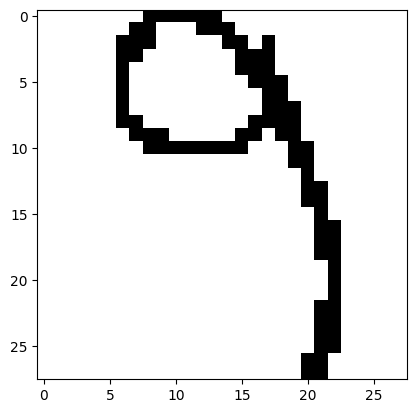

In [31]:
df1=pd.read_parquet('data.parquet.32000')
df1=pd.concat([df1, pd.DataFrame(dfK.values, columns=df1.columns)], ignore_index=True)
print(df1.shape)
plt.imshow(cmap='gray', vmin=0, vmax=255, X=df1.iloc[5, 1:].values.reshape(28, 28))
plt.show()